In [62]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
sale=pd.read_csv(r"C:\Users\Fakhruddin\Downloads\archive (5)\supermarket_sales - Sheet1.csv")

In [64]:
sale.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [65]:
sale.shape

(1000, 17)

In [66]:
sale.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [67]:
sale.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [68]:
sale.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [69]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [70]:
sale['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [71]:
sale['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [72]:
sale['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [73]:
sale['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [74]:
sale[sale['Payment']=='Credit card']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,156-20-0370,B,Mandalay,Normal,Female,Electronic accessories,25.45,1,1.2725,26.7225,3/10/2019,18:10,Credit card,25.45,4.761905,1.2725,5.1
979,151-33-7434,B,Mandalay,Normal,Female,Food and beverages,67.77,1,3.3885,71.1585,2/4/2019,20:43,Credit card,67.77,4.761905,3.3885,6.5
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,1/3/2019,19:08,Credit card,496.00,4.761905,24.8000,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4


In [75]:
sale['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [76]:
sale['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [77]:
sale['Branch'].value_counts()



A    340
B    332
C    328
Name: Branch, dtype: int64

In [78]:
sale['gross margin percentage'].unique()

array([4.76190476])

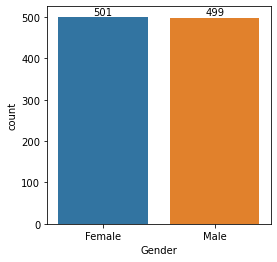

In [79]:
###the chart showing that the number of male and female

plt.figure(figsize=(4,4))

ax=sns.countplot(data=sale,x='Gender')
ax.bar_label(ax.containers[0])


plt.show()

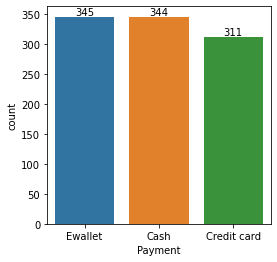

In [80]:
###the chart showin that the different types of payment

plt.figure(figsize=(4,4))

ax=sns.countplot(data=sale,x='Payment')
ax.bar_label(ax.containers[0])


plt.show()

In [81]:
sale.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


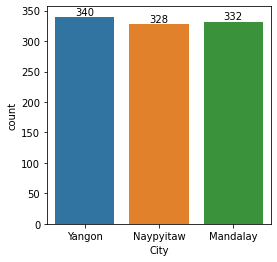

In [82]:
plt.figure(figsize=(4,4))

ax=sns.countplot(data=sale,x='City')
ax.bar_label(ax.containers[0])


plt.show()

In [83]:
sale[sale['Rating'] > 9]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
23,636-48-8204,A,Yangon,Normal,Male,Electronic accessories,34.56,5,8.6400,181.4400,2/17/2019,11:15,Ewallet,172.80,4.761905,8.6400,9.9
28,145-94-9061,B,Mandalay,Normal,Female,Food and beverages,88.36,5,22.0900,463.8900,1/25/2019,19:48,Cash,441.80,4.761905,22.0900,9.6
45,132-32-9879,B,Mandalay,Member,Female,Electronic accessories,93.96,4,18.7920,394.6320,3/9/2019,18:00,Cash,375.84,4.761905,18.7920,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,256-58-3609,C,Naypyitaw,Member,Male,Fashion accessories,91.98,1,4.5990,96.5790,3/18/2019,15:29,Cash,91.98,4.761905,4.5990,9.8
961,324-92-3863,A,Yangon,Member,Male,Electronic accessories,20.89,2,2.0890,43.8690,2/5/2019,18:45,Cash,41.78,4.761905,2.0890,9.8
967,195-06-0432,A,Yangon,Member,Male,Home and lifestyle,81.01,3,12.1515,255.1815,1/13/2019,12:55,Credit card,243.03,4.761905,12.1515,9.3
968,605-03-2706,A,Yangon,Normal,Female,Health and beauty,15.80,3,2.3700,49.7700,3/25/2019,18:02,Cash,47.40,4.761905,2.3700,9.5


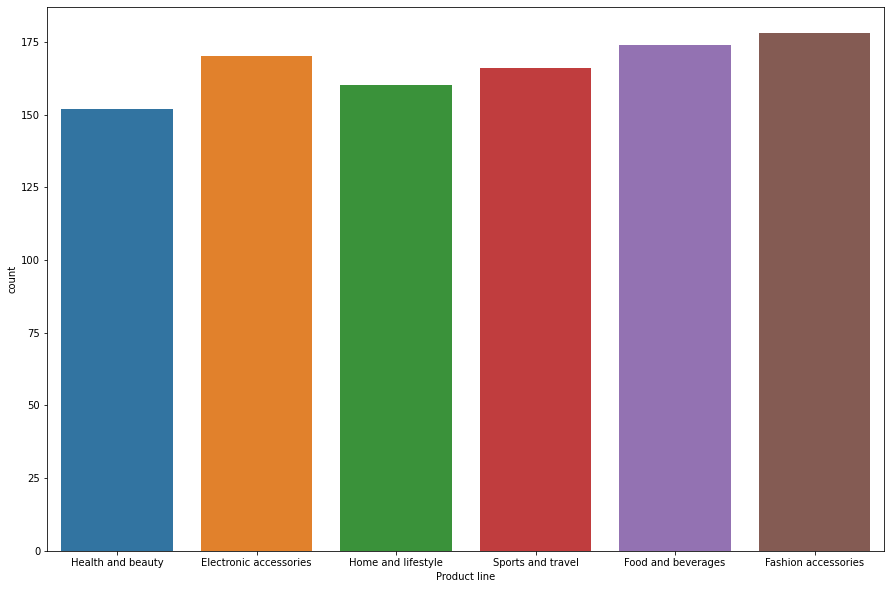

In [84]:
#x='Product line'
plt.figure(figsize=(15,10))

sns.countplot(data=sale,x='Product line')

plt.show()

In [ ]:
plt.subplots(figsize=(16,16))

sns.boxplot(y="Quantity", x="Product line", data=sale,linewidth=2.5,
            saturation=0.7)

plt.show()

In [ ]:
sale.head(2)

In [ ]:
sale.shape

In [ ]:
sale = sale.drop(['Invoice ID'], axis = 1)

In [ ]:
sale.head(2)

In [ ]:
city= pd.DataFrame(sale['City'].value_counts())

city

In [ ]:
sale.head(2)

In [ ]:
####products and there ratings########

trace=go.Scatter(x=sale['Product line'],y=sale['Rating'],
                mode='markers',
                marker={'color':'#d62728','size':10})

data=[trace]

layout=go.Layout(title='City',
                xaxis={'title':'Batsman Average'},
                yaxis={'title':'Batsman Strike Rate'})

fig=go.Figure(data=data,layout=layout)

#pyo.plot(fig)

fig.show()

In [ ]:
###different payment and cogs######## 


trace=go.Bar(x=sale['Payment'],y=sale['cogs'],marker={'color':'#d62728'})

data=[trace]

layout=go.Layout(title='product ratings',
                xaxis={'title':'products'},
                yaxis={'title':'Ratings'})

fig=go.Figure(data=data,layout=layout)

fig.show()